In [47]:

%load_ext autoreload
%autoreload
%matplotlib inline
import gym
import numpy as np
import matplotlib.pyplot as plt

from tabular import (
    train_with_plots,
    dyna_q,
    sarsa_lambda,
    q_learning
)

from math_utils import (
    exp_decay,
    harmonic_sequence,
    softmax_policy
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:

max_eps = int(5e3)
alpha = harmonic_sequence(2e-2, 1e-3, 1e-5)

temp = exp_decay(0.5, 0.01, 1e-5)
gamma = 1.0
policy = softmax_policy(temp)

q_learning_episode_fn = q_learning(policy, gamma, alpha)

lambda_ = 0.5
sarsa_lambda_episode_fn = sarsa_lambda(policy, gamma, alpha, lambda_)

n_planning = 10
dyna_q_episode_fn = dyna_q(policy, gamma, alpha, n_planning)

def initialisation(state_size, action_size):
    Q = np.zeros((state_size, action_size), np.float64)
    return Q,

def dyna_q_initialisation(state_size, action_size):
    Q = np.zeros((state_size, action_size), np.float64)
    R = np.zeros((state_size, action_size, state_size), np.float64)
    T = np.zeros((state_size, action_size, state_size), np.float64)
    return Q, R, T

def cliff_walking(fig, episode_fn, initialisation_fn):
    env = gym.make('CliffWalking-v0')

    state_size = env.observation_space.n
    action_size = env.action_space.n
    
    init = initialisation_fn(state_size, action_size)
    
    returns, tracks = train_with_plots(fig, env, episode_fn, max_eps, 100, 
                                       [-250, 0], 
                                       *init)
    
    return returns, tracks

def figure():
    return plt.figure(figsize=(12, 4))


## Q-learning

 5000: -13.14

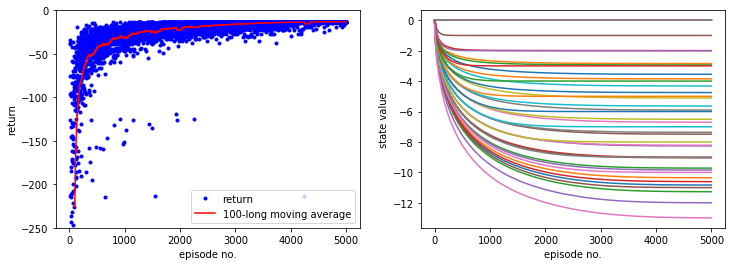

In [56]:
cliff_walking(figure(), q_learning_episode_fn, initialisation);


## sarsa lambda 

 5000: -13.0

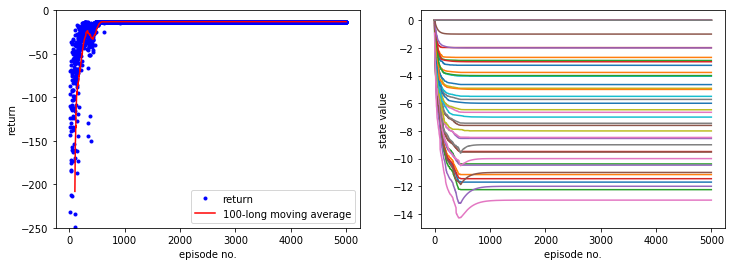

In [57]:
cliff_walking(figure(), sarsa_lambda_episode_fn, initialisation);


## dyna-q

 5000: -13.0

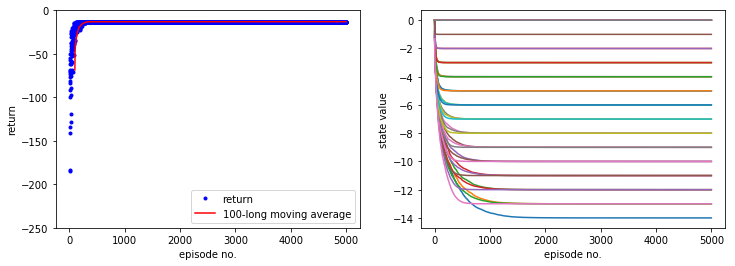

In [58]:
cliff_walking(figure(), dyna_q_episode_fn, dyna_q_initialisation);
